In [1]:
import serde.csv, pandas as pd
from pathlib import Path
from tum.actors.entry import *
from sm.namespaces.utils import KGName
from sm.dataset import Dataset
from tum.make_db import CRITICAL_MAAS_DIR

/Volumes/research/darpa-criticalmaas/ta2-table-understanding/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-06 12:44:06,010	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### Generate candidate graph

In [2]:
actor = G.create_actor(
    MinmodGraphInferenceActor,
    [
        DBActorArgs(
            kgdbs=[
                KGDBArgs(
                    name=KGName.Generic,
                    version="20231130",
                    datadir=CRITICAL_MAAS_DIR / "data/databases",
                )
            ]
        ),
        DataActorArgs(skip_unk_ont_ent=True, skip_no_sm=True),
        MinmodGraphGenerationActorArgs(
            train_dsquery="darpa-criticalmaas",
            meta_prop_file=CRITICAL_MAAS_DIR
            / "ta2-table-understanding/data/meta_property/data.csv",
            top_n_stypes=2,
        ),
        MinmodGraphInferenceActorArgs(),
    ],
)

2023-12-06 12:44:07.776 | DEBUG    | ream.actor_graph:create_actor:264 - Determine the actor to run...
2023-12-06 12:44:07.776 | DEBUG    | ream.actor_graph:create_actor:266 - Initializing argument parser...
2023-12-06 12:44:07.777 | DEBUG    | ream.actor_graph:create_actor:283 - Constructing the actor...


In [5]:
test_exs = Dataset(CRITICAL_MAAS_DIR / "ta2-table-understanding/examples").load()

In [8]:
with actor.data_actor.use_examples(
    "darpa-criticalmaas",
    Dataset(CRITICAL_MAAS_DIR / "ta2-table-understanding/data/known_models").load(),
    prefix="",
):
    output = []
    for test_ex in test_exs:
        with actor.data_actor.use_example(
            test_ex.id,
            test_ex,
        ) as testquery:
            sm = actor(testquery)
            output.append(sm[0])

2023-12-06 12:44:37.395 | DEBUG    | MinmodGraphGenerationActor:ream.actors.base:get_working_fs:93 - Using working directory: /Volumes/research/darpa-criticalmaas/data/ream/MinmodGraphGenerationActor/v108/001
2023-12-06 12:44:37.487 | INFO     | sm.misc.ray_helper:ray_init:35 - Initialize ray with args: {'log_to_driver': False}
2023-12-06 12:44:39,313	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8267 
2023-12-06 12:44:43.246 | DEBUG    | dsl.dsl:get_model:87 - Load previous trained model...
/Volumes/research/dsl/dsl/feature_extraction/column_base/numeric.py:11: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(col1.get_numeric_data(), col2.get_numeric_data())[1]
2023-12-06 12:44:43.618 | INFO     | tum.actors.semanticmodel:gen_graph:120 - Candidate Graph with: 24 nodes and 78 edges


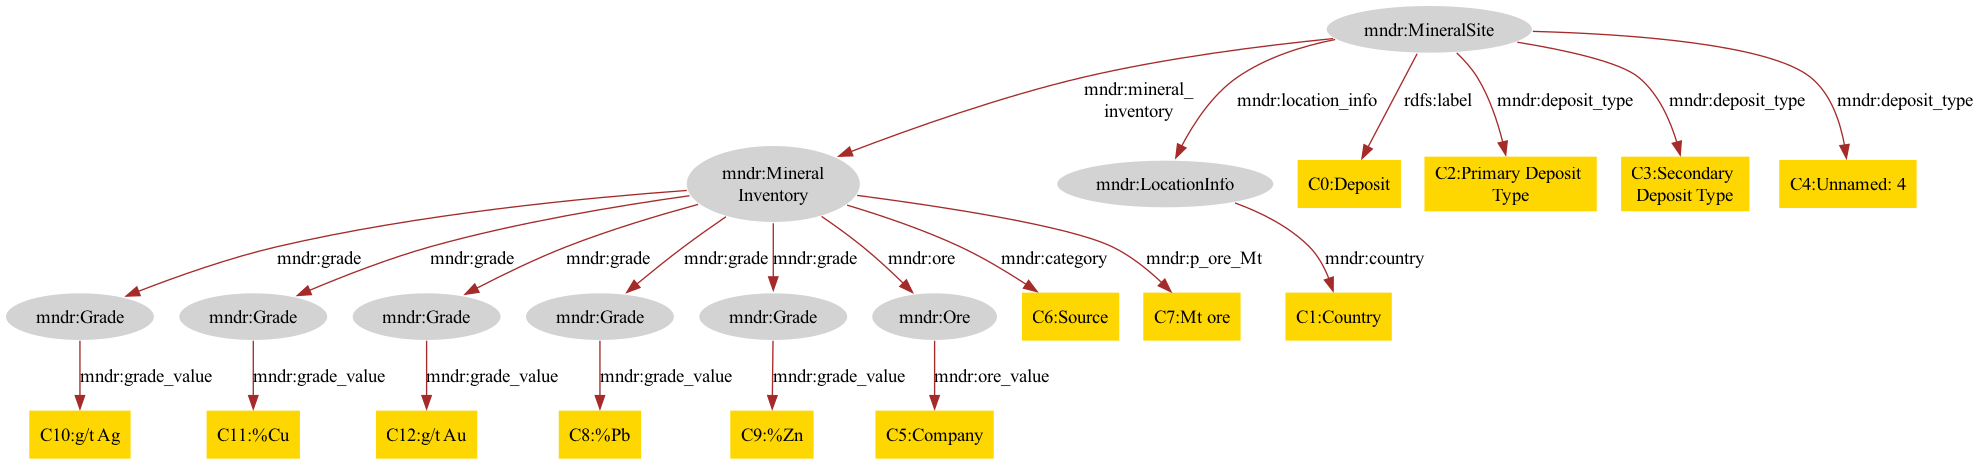

In [9]:
for sm in output:
    sm.draw()